In [1]:

import pandas as pd
import gffutils
import pybedtools
import re
import numpy as np

v19db_filename = '/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotation.gtf.db'
v19db = gffutils.FeatureDB(v19db_filename)

folder = '/home/obotvinnik/projects/singlecell_pnms/analysis/csvs_for_paper'
se_events = pd.read_csv('{}/se_events_with_stressed.csv'.format(folder))
se_events.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


,exon1,exon2,exon3,junction12,junction23,junction13,event_id,isoform1_transcripts,isoform2_transcripts
0,exon:chr10:51732523-51732902:+,exon:chr10:51740949-51741041:+,exon:chr10:51751436-51751504:+,chr10:51732903-51740948:+,chr10:51741042-51751435:+,chr10:51732903-51751435:+,exon:chr10:51732523-51732902:+@exon:chr10:5174...,[],[]
1,exon:chr1:32669480-32669646:+,exon:chr1:32669787-32669980:+,exon:chr1:32670199-32670988:+,chr1:32669647-32669786:+,chr1:32669981-32670198:+,chr1:32669647-32670198:+,exon:chr1:32669480-32669646:+@exon:chr1:326697...,[],['ENST00000421922.2']
2,exon:chr11:18425241-18425358:+,exon:chr11:18426996-18427119:+,exon:chr11:18428664-18429394:+,chr11:18425359-18426995:+,chr11:18427120-18428663:+,chr11:18425359-18428663:+,exon:chr11:18425241-18425358:+@exon:chr11:1842...,[],['ENST00000379412.5']
3,exon:chr10:99213311-99213420:+,exon:chr10:99213556-99213603:+,exon:chr10:99214471-99214556:+,chr10:99213421-99213555:+,chr10:99213604-99214470:+,chr10:99213421-99214470:+,exon:chr10:99213311-99213420:+@exon:chr10:9921...,['ENST00000487315.1'],[]
4,exon:chr1:150464466-150464965:+,exon:chr1:150469286-150469384:+,exon:chr1:150470006-150470073:+,chr1:150464966-150469285:+,chr1:150469385-150470005:+,chr1:150464966-150470005:+,exon:chr1:150464466-150464965:+@exon:chr1:1504...,['ENST00000460794.1'],[]


In [2]:
se_events.shape

(101735, 9)

In [3]:
se_events = se_events.loc[~se_events['junction12'].str.startswith('exon')]
se_events.shape

(101735, 9)

Added this line before I fixed the bug in outrigger to only iterate over exons

In [4]:
se_events.to_csv('{}/se_events_with_stressed.csv'.format(folder), index=False)

In [5]:
mxe_events = pd.read_csv('{}/mxe_events_with_stressed.csv'.format(folder))
mxe_events.head()

,exon1,exon2,exon3,exon4,junction13,junction34,junction12,junction24,event_id
0,exon:chr8:144663224-144663324:-,exon:chr8:144668389-144668460:-,exon:chr8:144663456-144663498:-,exon:chr8:144668899-144669019:-,chr8:144663325-144663455:-,chr8:144663499-144668898:-,chr8:144663325-144668388:-,chr8:144668461-144668898:-,exon:chr8:144663224-144663324:-@exon:chr8:1446...
1,exon:chr19:8376168-8376479:-,exon:chr19:8385741-8385790:-,exon:chr19:8381380-8381529:-,exon:chr19:8386192-8386259:-,chr19:8376480-8381379:-,chr19:8381530-8386191:-,chr19:8376480-8385740:-,chr19:8385791-8386191:-,exon:chr19:8376168-8376479:-@exon:chr19:838574...
2,exon:chr17:33307578-33307641:+,exon:chr17:33310021-33310571:+,exon:chr17:33313007-33313150:+,exon:chr17:33316485-33316899:+,chr17:33307642-33313006:+,chr17:33313151-33316484:+,chr17:33307642-33310020:+,chr17:33310572-33316484:+,exon:chr17:33307578-33307641:+@exon:chr17:3331...
3,exon:chr14:31091525-31091605:+,exon:chr14:31097415-31097485:+,exon:chr14:31099683-31099771:+,exon:chr14:31103153-31103243:+,chr14:31091606-31099682:+,chr14:31099772-31103152:+,chr14:31091606-31097414:+,chr14:31097486-31103152:+,exon:chr14:31091525-31091605:+@exon:chr14:3109...
4,exon:chr1:247002400-247004300:-,exon:chr1:247007097-247007230:-,exon:chr1:247005996-247006078:-,exon:chr1:247012917-247013151:-,chr1:247004301-247005995:-,chr1:247006079-247012916:-,chr1:247004301-247007096:-,chr1:247007231-247012916:-,exon:chr1:247002400-247004300:-@exon:chr1:2470...


## Skipped Exon (SE)

In [7]:
isoform1_exons = 'exon1', 'exon3'
isoform2_exons = 'exon1', 'exon2','exon3'

In [8]:
%%time
se_events['isoform1_transcripts'] = se_events.apply(
    lambda row: map(lambda x: x.id, get_isoform_transcripts(row, exons=isoform1_exons, exclude_exons='exon2', db=v19db)), axis=1)

CPU times: user 6min 5s, sys: 2min 25s, total: 8min 30s
Wall time: 29min 34s


In [9]:
%%time
se_events['isoform2_transcripts'] = se_events.apply(
    lambda row: map(lambda x: x.id, get_isoform_transcripts(row, exons=isoform2_exons, db=v19db)), axis=1)

CPU times: user 6min 10s, sys: 2min 26s, total: 8min 37s
Wall time: 29min 5s


In [10]:
%%time
mxe_events['isoform1_transcripts'] = mxe_events.apply(
    lambda row: map(lambda x: x.id, get_isoform_transcripts(row, exons=['exon1', 'exon3', 'exon4'], 
                                                            exclude_exons='exon2', db=v19db)), axis=1)

CPU times: user 2min 32s, sys: 55 s, total: 3min 27s
Wall time: 10min 32s


In [11]:
%%time
mxe_events['isoform2_transcripts'] = mxe_events.apply(
    lambda row: map(lambda x: x.id, get_isoform_transcripts(row, exons=['exon1', 'exon2', 'exon4'], 
                                                            exclude_exons='exon3', db=v19db)), axis=1)

CPU times: user 2min 33s, sys: 56.9 s, total: 3min 30s
Wall time: 10min 34s


In [13]:
mxe_events.head()

,exon1,exon2,exon3,exon4,junction13,junction34,junction12,junction24,event_id,isoform1_transcripts,isoform2_transcripts
0,exon:chr8:144663224-144663324:-,exon:chr8:144668389-144668460:-,exon:chr8:144663456-144663498:-,exon:chr8:144668899-144669019:-,chr8:144663325-144663455:-,chr8:144663499-144668898:-,chr8:144663325-144668388:-,chr8:144668461-144668898:-,exon:chr8:144663224-144663324:-@exon:chr8:1446...,[],"[ENST00000419152.2, ENST00000534232.1, ENST000..."
1,exon:chr19:8376168-8376479:-,exon:chr19:8385741-8385790:-,exon:chr19:8381380-8381529:-,exon:chr19:8386192-8386259:-,chr19:8376480-8381379:-,chr19:8381530-8386191:-,chr19:8376480-8385740:-,chr19:8385791-8386191:-,exon:chr19:8376168-8376479:-@exon:chr19:838574...,[],[]
2,exon:chr17:33307578-33307641:+,exon:chr17:33310021-33310571:+,exon:chr17:33313007-33313150:+,exon:chr17:33316485-33316899:+,chr17:33307642-33313006:+,chr17:33313151-33316484:+,chr17:33307642-33310020:+,chr17:33310572-33316484:+,exon:chr17:33307578-33307641:+@exon:chr17:3331...,[],[]
3,exon:chr14:31091525-31091605:+,exon:chr14:31097415-31097485:+,exon:chr14:31099683-31099771:+,exon:chr14:31103153-31103243:+,chr14:31091606-31099682:+,chr14:31099772-31103152:+,chr14:31091606-31097414:+,chr14:31097486-31103152:+,exon:chr14:31091525-31091605:+@exon:chr14:3109...,"[ENST00000544052.2, ENST00000484733.2]","[ENST00000463622.2, ENST00000421551.3]"
4,exon:chr1:247002400-247004300:-,exon:chr1:247007097-247007230:-,exon:chr1:247005996-247006078:-,exon:chr1:247012917-247013151:-,chr1:247004301-247005995:-,chr1:247006079-247012916:-,chr1:247004301-247007096:-,chr1:247007231-247012916:-,exon:chr1:247002400-247004300:-@exon:chr1:2470...,[],[]


In [12]:
%load_ext autoreload
%autoreload

In [14]:
import outrigger

In [16]:
from outrigger.junctions_to_events import consolidate_junction_events

In [21]:
se_junctions = ['junction13', 'junction12',  'junction23']
transcript_cols = ['isoform1_transcripts', 'isoform2_transcripts']

se_consolidated = se_events.groupby(se_junctions).apply(
    lambda x: consolidate_junction_events(x, v19db, event_col='event_id', transcript_cols=transcript_cols))

In [18]:
mxe_junctions = ['junction13', 'junction34', 'junction12',  'junction24']
transcript_cols = ['isoform1_transcripts', 'isoform2_transcripts']


mxe_consolidated = mxe_events.groupby(mxe_junctions).apply(
    lambda x: consolidate_junction_events(x, v19db, event_col='event_id', transcript_cols=transcript_cols))

In [22]:
def consolidated_series_to_dataframe(series):
    dataframe = series.reset_index()
    dataframe['criteria_full'] = dataframe[0].map(lambda x: x[0])
    dataframe['event_id'] = dataframe[0].map(lambda x: x[1])
    dataframe['criteria'] = dataframe[0].map(lambda x: x[0].split(',')[0])
    dataframe['criteria_additional'] = dataframe['criteria_full'].map(
        lambda x: x.split(',')[1] if len(x.split(',')) > 1 else np.nan)
    dataframe = dataframe.drop(0, axis=1)
    return dataframe



In [23]:
%%time
mxe_consolidated_df = consolidated_series_to_dataframe(mxe_consolidated)
se_consolidated_df = consolidated_series_to_dataframe(se_consolidated)

CPU times: user 119 ms, sys: 3 ms, total: 122 ms
Wall time: 120 ms


In [24]:
figure_folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure0'
! mkdir $figure_folder

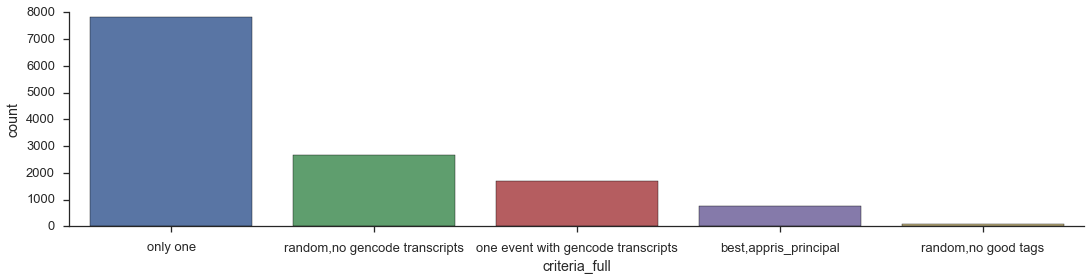

In [30]:
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', context='talk')

g = sns.factorplot(x='criteria_full', data=mxe_consolidated_df, kind='count', aspect=3.75)
g.savefig('{}/mxe_consolidated_events_criteria.pdf'.format(figure_folder))

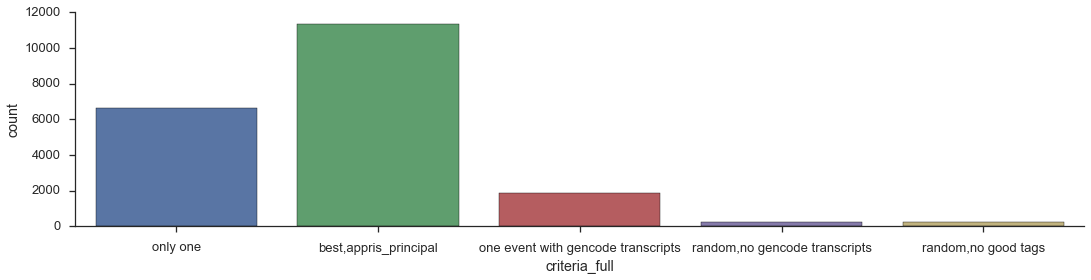

In [31]:
g = sns.factorplot(x='criteria_full', data=se_consolidated_df, kind='count', aspect=3.75)
g.savefig('{}/se_consolidated_events_criteria.pdf'.format(figure_folder))

In [34]:
folder = '/projects/ps-yeolab2/obotvinnik/singlecell_pnm'

In [35]:
mxe_consolidated_df.to_csv('{}/mutually_exclusive_exon_consolidated_events.csv'.format(folder))
se_consolidated_df.to_csv('{}/skipped_exon_consolidated_events.csv'.format(folder))